In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

In [ ]:
!unzip /content/drive/MyDrive/COVID_IMAGE.zip

Archive:  /content/drive/MyDrive/COVID_IMAGE.zip
  inflating: Covid19-dataset/test/Covid/0100.jpeg  
  inflating: Covid19-dataset/test/Covid/0102.jpeg  
  inflating: Covid19-dataset/test/Covid/0105.png  
  inflating: Covid19-dataset/test/Covid/0106.jpeg  
  inflating: Covid19-dataset/test/Covid/0108.jpeg  
  inflating: Covid19-dataset/test/Covid/0111.jpg  
  inflating: Covid19-dataset/test/Covid/0112.jpg  
  inflating: Covid19-dataset/test/Covid/0113.jpg  
  inflating: Covid19-dataset/test/Covid/0115.jpeg  
  inflating: Covid19-dataset/test/Covid/0118.jpeg  
  inflating: Covid19-dataset/test/Covid/0119.jpeg  
  inflating: Covid19-dataset/test/Covid/0120.jpg  
  inflating: Covid19-dataset/test/Covid/094.png  
  inflating: Covid19-dataset/test/Covid/096.png  
  inflating: Covid19-dataset/test/Covid/098.jpeg  
  inflating: Covid19-dataset/test/Covid/COVID-00003b.jpg  
  inflating: Covid19-dataset/test/Covid/COVID-00012.jpg  
  inflating: Covid19-dataset/test/Covid/COVID-00022.jpg  
  infl

In [ ]:
import zipfile
import os

# Define file path
zip_path = "/content/drive/MyDrive/COVID_IMAGE.zip"
extract_path = "/mnt/data/COVID_IMAGE"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the extracted files and directories
extracted_files = os.listdir(extract_path)
extracted_files


['Covid19-dataset']

In [ ]:
# List contents of the Covid19-dataset directory
dataset_path = os.path.join(extract_path, "Covid19-dataset")
subdirectories = os.listdir(dataset_path)

# Count the number of images in each subdirectory
category_counts = {category: len(os.listdir(os.path.join(dataset_path, category))) for category in subdirectories}
category_counts


{'train': 3, 'test': 3}

In [ ]:
# List subdirectories inside train and test folders
train_subdirs = os.listdir(os.path.join(dataset_path, "train"))
test_subdirs = os.listdir(os.path.join(dataset_path, "test"))

train_subdirs, test_subdirs


(['Viral Pneumonia', 'Covid', 'Normal'],
 ['Viral Pneumonia', 'Covid', 'Normal'])

In [ ]:
# Count images in each category for train and test sets
train_counts = {category: len(os.listdir(os.path.join(dataset_path, "train", category))) for category in train_subdirs}
test_counts = {category: len(os.listdir(os.path.join(dataset_path, "test", category))) for category in test_subdirs}

train_counts, test_counts


({'Viral Pneumonia': 70, 'Covid': 111, 'Normal': 70},
 {'Viral Pneumonia': 20, 'Covid': 26, 'Normal': 20})

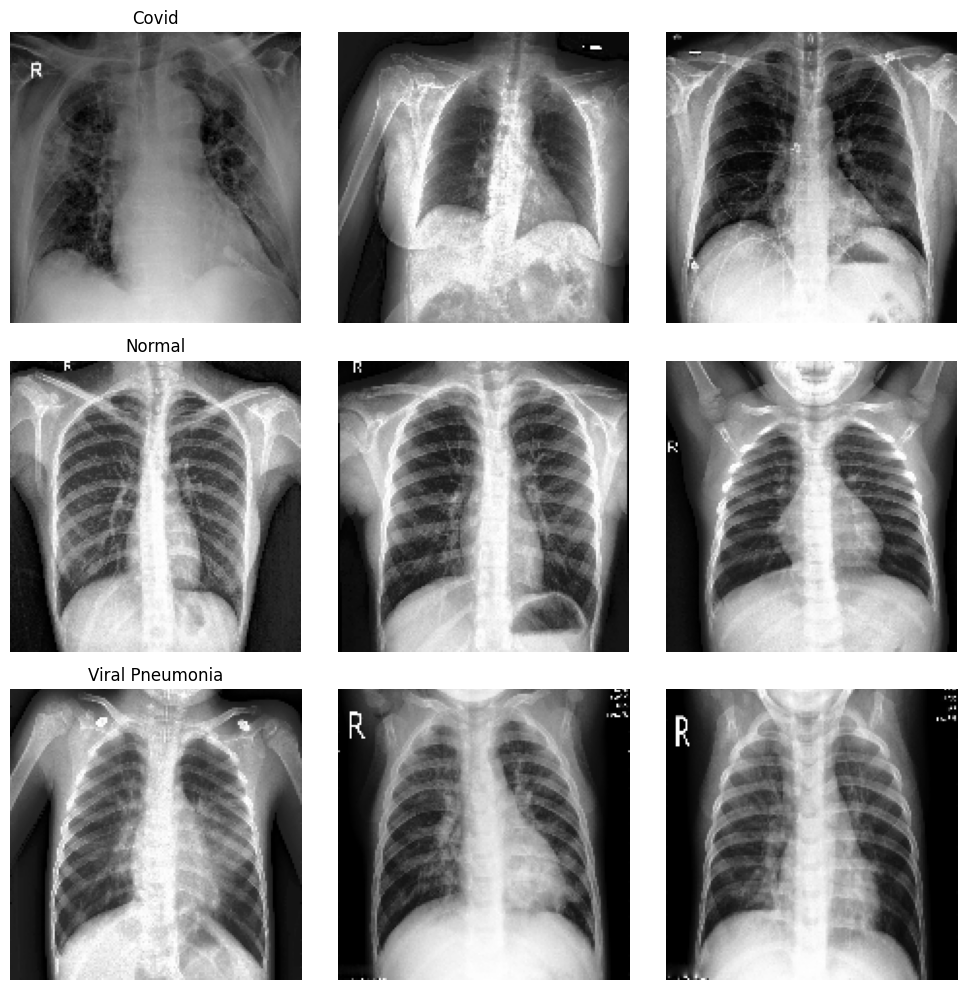

In [ ]:

# Function to display sample images from each category
def show_sample_images(dataset_path, categories, num_samples=3):
    fig, axes = plt.subplots(len(categories), num_samples, figsize=(10, 10))

    for i, category in enumerate(categories):
        category_path = os.path.join(dataset_path, "train", category)
        image_files = os.listdir(category_path)[:num_samples]  # Select few images

        for j, img_file in enumerate(image_files):
            img_path = os.path.join(category_path, img_file)
            img = cv2.imread(img_path)  # Read image
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = cv2.resize(img, (150, 150))  # Resize for consistency

            axes[i, j].imshow(img)
            axes[i, j].axis("off")
            if j == 0:
                axes[i, j].set_title(category, fontsize=12)

    plt.tight_layout()
    plt.show()

# Define dataset path and categories
dataset_path = "/content/Covid19-dataset"
categories = ["Covid", "Normal", "Viral Pneumonia"]

# Call function
show_sample_images(dataset_path, categories)


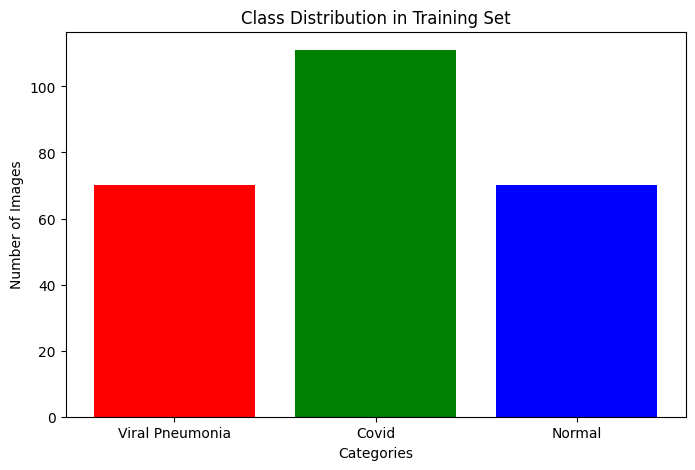

In [ ]:
import os
import matplotlib.pyplot as plt

# Define dataset path
dataset_path = "/content/Covid19-dataset"
train_dir = os.path.join(dataset_path, "train")

# Count number of images in each category
categories = os.listdir(train_dir)
category_counts = {category: len(os.listdir(os.path.join(train_dir, category))) for category in categories}

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(category_counts.keys(), category_counts.values(), color=['red', 'green', 'blue'])
plt.xlabel("Categories")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Training Set")
plt.show()


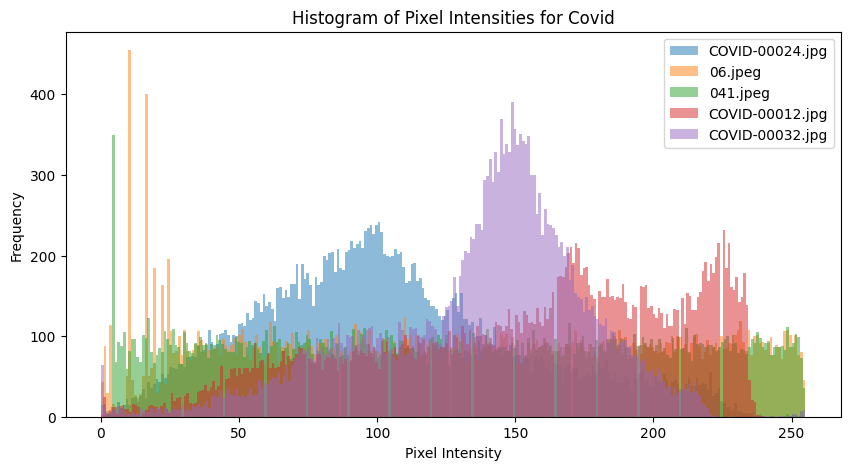

In [ ]:
def plot_histogram(dataset_path, category, num_samples=5):
    category_path = os.path.join(dataset_path, "train", category)
    image_files = os.listdir(category_path)[:num_samples]

    plt.figure(figsize=(10, 5))

    for img_file in image_files:
        img_path = os.path.join(category_path, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
        img = cv2.resize(img, (150, 150))

        plt.hist(img.ravel(), bins=256, alpha=0.5, label=img_file)

    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of Pixel Intensities for {category}")
    plt.legend()
    plt.show()

# Plot histogram for one category (change 'Covid' to another category as needed)
plot_histogram(dataset_path, "Covid")


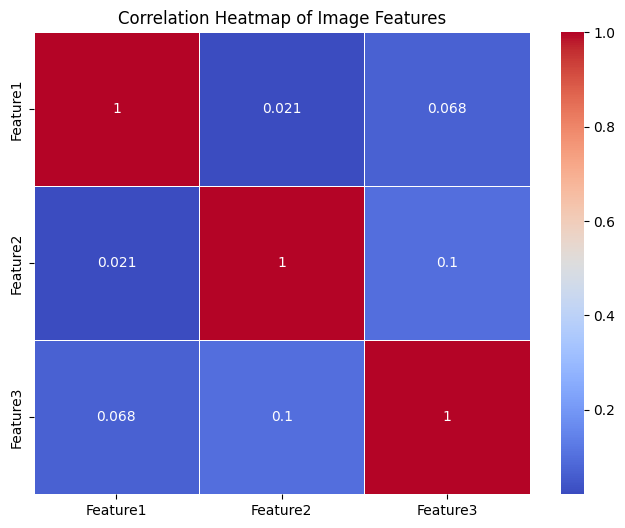

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

# Generate sample feature data (replace with real extracted image features)
data = {
    "Feature1": np.random.rand(100),
    "Feature2": np.random.rand(100),
    "Feature3": np.random.rand(100)
}

df = pd.DataFrame(data)

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Image Features")
plt.show()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [ ]:
# Early Stopping: Stop training if validation accuracy doesn't improve for 5 consecutive epochs
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore best model weights
)

# ReduceLROnPlateau: Reduce learning rate if validation loss stops improving
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.5,          # Reduce LR by half
    patience=3,          # Wait for 3 epochs before reducing LR
    min_lr=1e-6,         # Minimum learning rate
    verbose=1
)

# Combine Callbacks
callbacks_list = [early_stopping, reduce_lr]


In [ ]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=50,  # Train for a higher number of epochs
    callbacks=callbacks_list  # Include early stopping & LR reduction
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.3581 - loss: 1.1241 - val_accuracy: 0.3939 - val_loss: 1.0825 - learning_rate: 1.0000e-04
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.4575 - loss: 1.0765 - val_accuracy: 0.5303 - val_loss: 0.9734 - learning_rate: 1.0000e-04
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5078 - loss: 0.9790 - val_accuracy: 0.5303 - val_loss: 0.8921 - learning_rate: 1.0000e-04
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.6145 - loss: 0.9132 - val_accuracy: 0.7121 - val_loss: 0.7877 - learning_rate: 1.0000e-04
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.5895 - loss: 0.8638 - val_accuracy: 0.6667 - val_loss: 0.7382 - learning_rate: 1.0000e-04
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.6205 - loss: 0.8060 - val_accuracy: 0.6667 - val_loss: 0.6406 - learning_rate: 1.0000e-04
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.6679 - loss: 0.7478 - val_

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os


In [ ]:
dataset_path = "/mnt/data/COVID_IMAGE/Covid19-dataset"
train_dir = os.path.join(dataset_path, "train")
test_dir = os.path.join(dataset_path, "test")

In [ ]:
img_size = (150, 150)
batch_size = 32
# Data Augmentation for training set
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen_test = ImageDataGenerator(rescale=1./255)

In [ ]:
# Load Data
# Load training and testing data
train_data = datagen_train.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)
test_data = datagen_test.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: Covid, Normal, Viral Pneumonia
])


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
epochs = 20

history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=epochs
)


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.3663 - loss: 1.1155 - val_accuracy: 0.5152 - val_loss: 1.0277
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.4980 - loss: 1.0379 - val_accuracy: 0.4848 - val_loss: 0.9667
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.5116 - loss: 0.9591 - val_accuracy: 0.7879 - val_loss: 0.8434
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.6000 - loss: 0.8932 - val_accuracy: 0.7121 - val_loss: 0.7519
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.6342 - loss: 0.8231 - val_accuracy: 0.6061 - val_loss: 0.6687
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.5931 - loss: 0.8429 - val_accuracy: 0.7879 - val_loss: 0.6208
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.6459 - loss: 0.7310 - val_accuracy: 0.7121 - val_loss: 0.5630
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.6516 - loss: 0.6452 - val_accuracy: 0.7273 - val_loss: 0.5222
Epoch 9/

In [ ]:
# Evaluate on test data
eval_result = model.evaluate(test_data)

# Print test accuracy and loss
print(f"Test Loss: {eval_result[0]:.4f}, Test Accuracy: {eval_result[1]:.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step - accuracy: 0.8075 - loss: 0.4531
Test Loss: 0.4357, Test Accuracy: 0.8182


In [ ]:
model.save("covid_classification_cnn.h5")


Z-TEST

In [ ]:
import numpy as np
import os
import cv2
from scipy.stats import norm


In [ ]:
def get_mean_pixel_intensity(category_path, num_samples=100):
    image_files = os.listdir(category_path)[:num_samples]  # Select a sample
    pixel_means = []

    for img_file in image_files:
        img_path = os.path.join(category_path, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
        img = cv2.resize(img, (150, 150))
        pixel_means.append(np.mean(img))  # Compute mean pixel intensity

    return np.array(pixel_means)


In [ ]:
# Define dataset paths
covid_path = "/content/Covid19-dataset/train/Covid"
normal_path = "/content/Covid19-dataset/train/Normal"


covid_intensities = get_mean_pixel_intensity(covid_path, num_samples=100)
normal_intensities = get_mean_pixel_intensity(normal_path, num_samples=100)


In [ ]:
def z_test(sample1, sample2):
    mean1, mean2 = np.mean(sample1), np.mean(sample2)
    std1, std2 = np.std(sample1, ddof=1), np.std(sample2, ddof=1)  # Sample std dev
    n1, n2 = len(sample1), len(sample2)

    # Compute Z-score
    z_score = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))

    # Compute p-value (two-tailed test)
    p_value = 2 * (1 - norm.cdf(abs(z_score)))

    return z_score, p_value

# Run Z-test
z_score, p_value = z_test(covid_intensities, normal_intensities)

# Print results
print(f"Z-Score: {z_score:.4f}")
print(f"P-Value: {p_value:.4f}")


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between Covid and Normal images.")
else:
    print("Fail to reject the null hypothesis: No significant difference found.")


Z-Score: 3.9237
P-Value: 0.0001
Reject the null hypothesis: There is a significant difference between Covid and Normal images.


T-TEST

In [ ]:
import numpy as np
import os
import cv2
from scipy.stats import ttest_ind


In [ ]:
def get_mean_pixel_intensity(category_path, num_samples=100):
    image_files = os.listdir(category_path)[:num_samples]  # Select a sample
    pixel_means = []

    for img_file in image_files:
        img_path = os.path.join(category_path, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
        img = cv2.resize(img, (150, 150))
        pixel_means.append(np.mean(img))  # Compute mean pixel intensity

    return np.array(pixel_means)


In [ ]:
# Define dataset paths
covid_path = "/content/Covid19-dataset/train/Covid"
normal_path = "/content/Covid19-dataset/train/Normal"

covid_intensities = get_mean_pixel_intensity(covid_path, num_samples=100)
normal_intensities = get_mean_pixel_intensity(normal_path, num_samples=100)


In [ ]:
# Perform Independent T-Test
t_stat, p_value = ttest_ind(covid_intensities, normal_intensities, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between Covid and Normal images.")
else:
    print("Fail to reject the null hypothesis: No significant difference found.")


T-Statistic: 3.9237
P-Value: 0.0001
Reject the null hypothesis: There is a significant difference between Covid and Normal images.


ANOVA-TEST

In [ ]:
import numpy as np
import os
import cv2
from scipy.stats import f_oneway


In [ ]:
def get_mean_pixel_intensity(category_path, num_samples=100):
    image_files = os.listdir(category_path)[:num_samples]  # Select a sample
    pixel_means = []

    for img_file in image_files:
        img_path = os.path.join(category_path, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
        img = cv2.resize(img, (150, 150))
        pixel_means.append(np.mean(img))  # Compute mean pixel intensity

    return np.array(pixel_means)


In [ ]:

covid_path = "/content/Covid19-dataset/train/Covid"
normal_path = "/content/Covid19-dataset/train/Normal"
pneumonia_path = "/content/Covid19-dataset/train/Viral Pneumonia"


covid_intensities = get_mean_pixel_intensity(covid_path, num_samples=100)
normal_intensities = get_mean_pixel_intensity(normal_path, num_samples=100)
pneumonia_intensities = get_mean_pixel_intensity(pneumonia_path, num_samples=100)


In [ ]:
f_stat, p_value = f_oneway(covid_intensities, normal_intensities, pneumonia_intensities)

# Print results
print(f"F-Statistic: {f_stat:.4f}")
print(f"P-Value: {p_value:.4f}")


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: At least one group has a significantly different mean pixel intensity.")
else:
    print("Fail to reject the null hypothesis: No significant difference found among the groups.")


F-Statistic: 19.8098
P-Value: 0.0000
Reject the null hypothesis: At least one group has a significantly different mean pixel intensity.
